INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

full.jsonl:   0%|          | 0.00/1.42M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['edge_index', 'y', 'num_nodes'],
        num_rows: 1000
    })
})


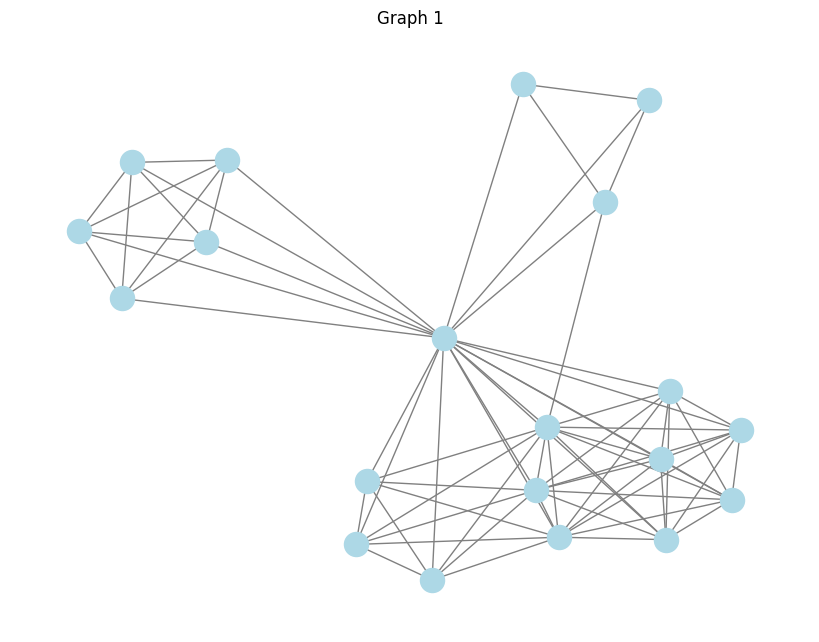

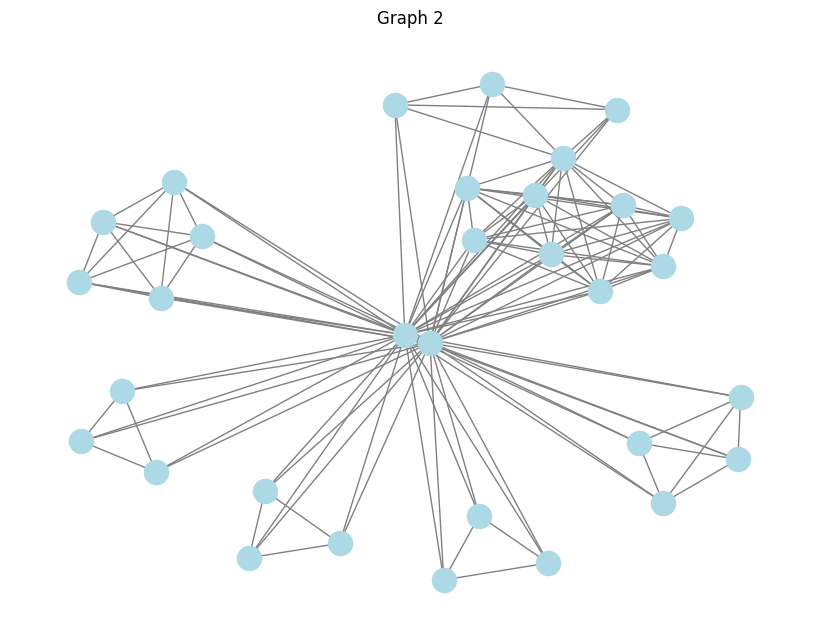

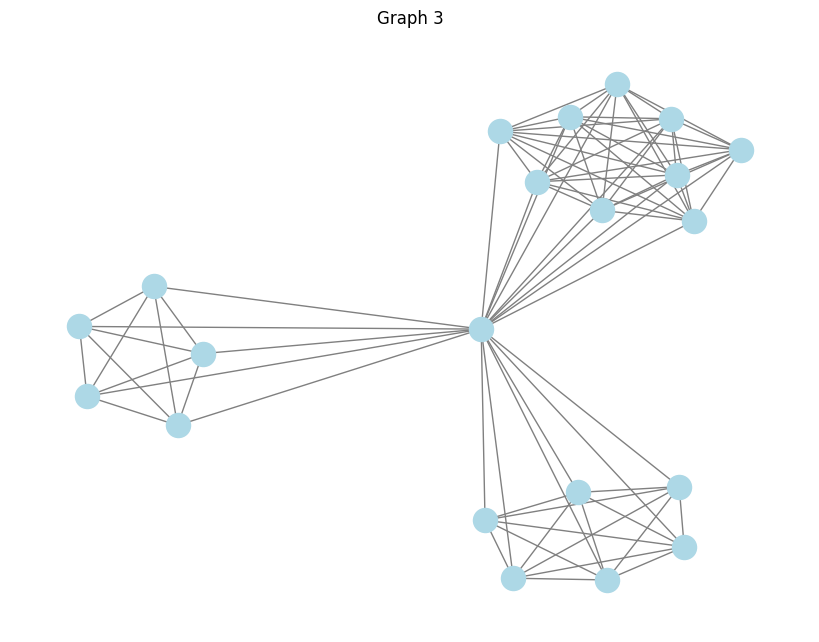

In [2]:
# Install required libraries (run this in a separate Colab cell)
!pip install datasets matplotlib networkx
# Import necessary libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Load the dataset from Hugging Face
ds = load_dataset("graphs-datasets/IMDB-BINARY")

# Inspect the dataset to check its structure
print(ds)

# Function to convert dataset into networkx graph using edge_index
def convert_to_graph(edge_index):
    G = nx.Graph()
    source_nodes = edge_index[0]
    target_nodes = edge_index[1]

    for source, target in zip(source_nodes, target_nodes):
        G.add_edge(source, target)

    return G

# Visualize the first few graphs from the dataset
def plot_graph(graph, title="Graph Visualization"):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=False, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title(title)
    plt.show()

# Visualize a few graphs from the dataset
for i in range(3):  # Modify this to show more graphs if needed
    edge_index = ds['train'][i]['edge_index']  # Use 'edge_index' for the graph's edges
    graph = convert_to_graph(edge_index)
    plot_graph(graph, title=f"Graph {i+1}")